In [133]:
import numpy as np
import pandas as pd
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt

In [6]:
resultados = pd.read_csv('resultados/Resultados para a base CMU 2.csv', index_col=[0])

In [7]:
resultados.shape
resultados.head()

(432, 14)

,adaptive,impostor_rate,len_attacks,method,model_size,normalize,rate_external_impostor,sampling,Bacc_mean,Bacc_std,FMR_mean,FMR_std,FNMR_mean,FNMR_std
0,False,0.3,NaN,Euclidian,40,False,0.0,Random,0.589108,0.203865,0.499045,0.347219,0.322740,0.254797
1,False,0.3,NaN,Euclidian,40,False,0.0,GenFirst,0.594042,0.202857,0.510663,0.351390,0.301253,0.250731
2,False,0.3,NaN,Euclidian,40,False,0.0,ImpFirst,0.588996,0.204771,0.499650,0.343735,0.322358,0.243153
3,False,0.3,NaN,Euclidian,40,False,0.5,Random,0.615372,0.166852,0.452317,0.277085,0.316939,0.256631
4,False,0.3,NaN,Euclidian,40,False,0.5,GenFirst,0.619893,0.163475,0.449007,0.280070,0.311206,0.252517


# Sistemas não adaptativos

## Algoritmo Euclidiano

In [41]:
df = resultados.groupby('sampling')['Bacc_mean', 'FMR_mean', 'FNMR_mean','Bacc_std', 'FMR_std', 'FNMR_std'].mean().reset_index()
df

,sampling,Bacc_mean,FMR_mean,FNMR_mean,Bacc_std,FMR_std,FNMR_std
0,GenFirst,0.681498,0.229367,0.407638,0.118968,0.196453,0.160866
1,ImpFirst,0.685278,0.220252,0.409192,0.125420,0.206870,0.159941
2,Random,0.677796,0.237054,0.407353,0.117275,0.192307,0.163097
3,SeriesAttack,0.677576,0.238496,0.406353,0.117866,0.192947,0.163828


In [139]:
tuple(df['sampling'])

('GenFirst', 'ImpFirst', 'Random', 'SeriesAttack')

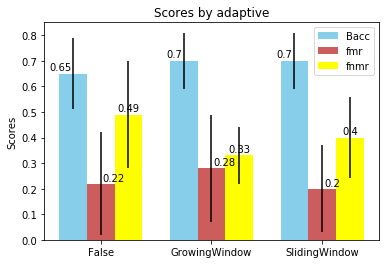

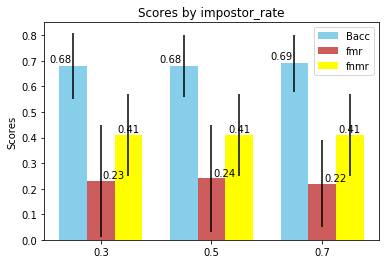

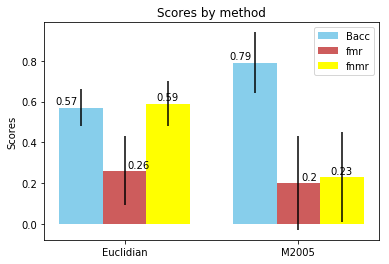

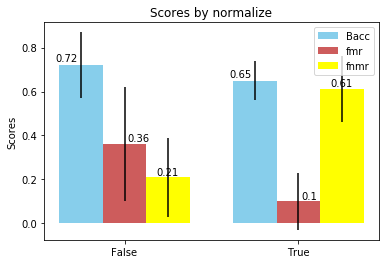

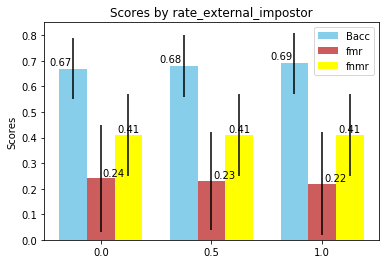

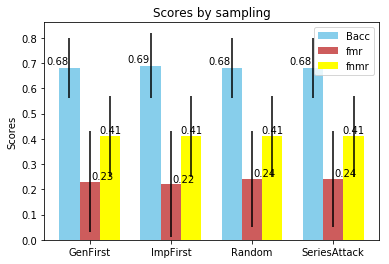

In [145]:
def make_plot(dataset, var):
    bacc_means, bacc_std = tuple(round(dataset['Bacc_mean'], 2)), tuple(round(dataset['Bacc_std'], 2))
    fmr_means, fmr_std = tuple(round(dataset['FMR_mean'], 2)), tuple(round(dataset['FMR_std'], 2))
    fnmr_means, fnmr_std = tuple(round(dataset['FNMR_mean'], 2)), tuple(round(dataset['FNMR_std'], 2))

    ind = np.arange(len(bacc_means))  # the x locations for the groups
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, bacc_means, width, yerr=bacc_std,
                    color='SkyBlue', label='Bacc')
    rects2 = ax.bar(ind + width, fmr_means, width, yerr=fmr_std,
                    color='IndianRed', label='fmr')
    rects3 = ax.bar(ind + 2*width, fnmr_means, width, yerr=fnmr_std,
                    color='yellow', label='fnmr')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Scores by ' + var)
    ax.set_xticks(ind+0.25)
    ax.set_xticklabels(tuple(df[var]))
    ax.legend()


    def autolabel(rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """
       # import pdb; pdb.set_trace();
        xpos = xpos.lower()  # normalize the case of the parameter
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                    '{}'.format(height), ha=ha[xpos], va='bottom')


    autolabel(rects1, "left")
    autolabel(rects2, "right")
    autolabel(rects3, "center")

    plt.savefig(os.path.join("graficos", var+"_mean.png"))
    plt.show()
    
vars_ = ['adaptive', 'impostor_rate', 'method',
       'normalize', 'rate_external_impostor', 'sampling']

graphs = list()
for v in vars_:
    df = resultados.groupby(v)['Bacc_mean', 'FMR_mean', 'FNMR_mean','Bacc_std', 'FMR_std', 'FNMR_std'].mean().reset_index()
    graphs.append(make_plot(dataset=df, var=v))

In [131]:
graphs

[None, None, None, None, None, None]

In [123]:
resultados.columns

Index(['adaptive', 'impostor_rate', 'len_attacks', 'method', 'model_size',
       'normalize', 'rate_external_impostor', 'sampling', 'Bacc_mean',
       'Bacc_std', 'FMR_mean', 'FMR_std', 'FNMR_mean', 'FNMR_std'],
      dtype='object')

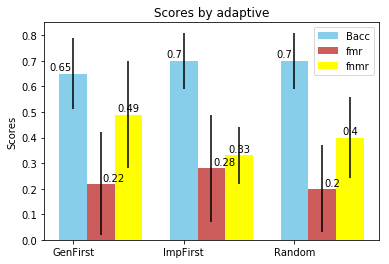

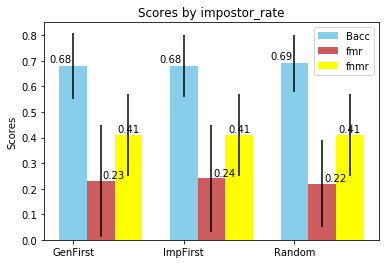

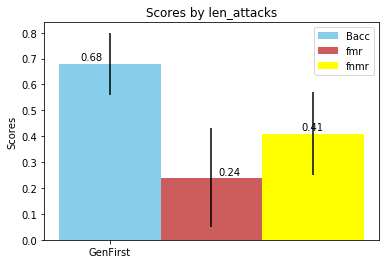

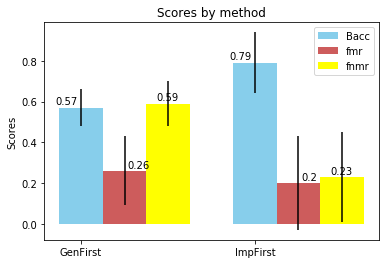

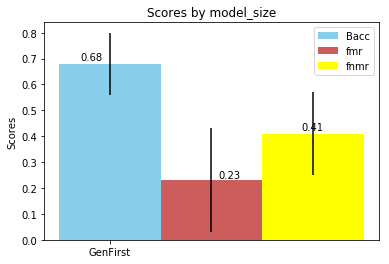

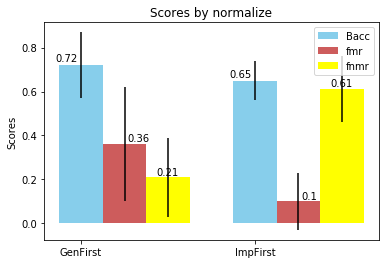

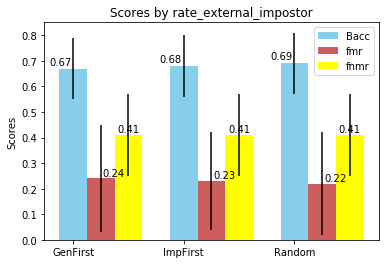

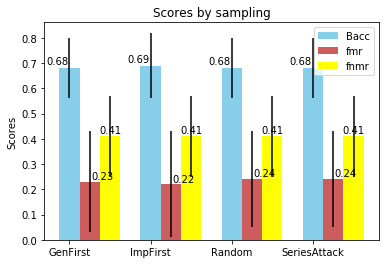

In [125]:
k = 'adaptive'
df = resultados.groupby(k)['Bacc_mean', 'FMR_mean', 'FNMR_mean','Bacc_std', 'FMR_std', 'FNMR_std'].mean().reset_index()
df

,adaptive,Bacc_mean,FMR_mean,FNMR_mean,Bacc_std,FMR_std,FNMR_std
0,False,0.646500,0.220044,0.486957,0.136872,0.204894,0.210913
1,GrowingWindow,0.695523,0.277453,0.331501,0.111594,0.214605,0.113202
2,SlidingWindow,0.699588,0.196380,0.404444,0.111181,0.171934,0.161685


In [42]:
import seaborn as sns

NameError: name 'df_continuous' is not defined

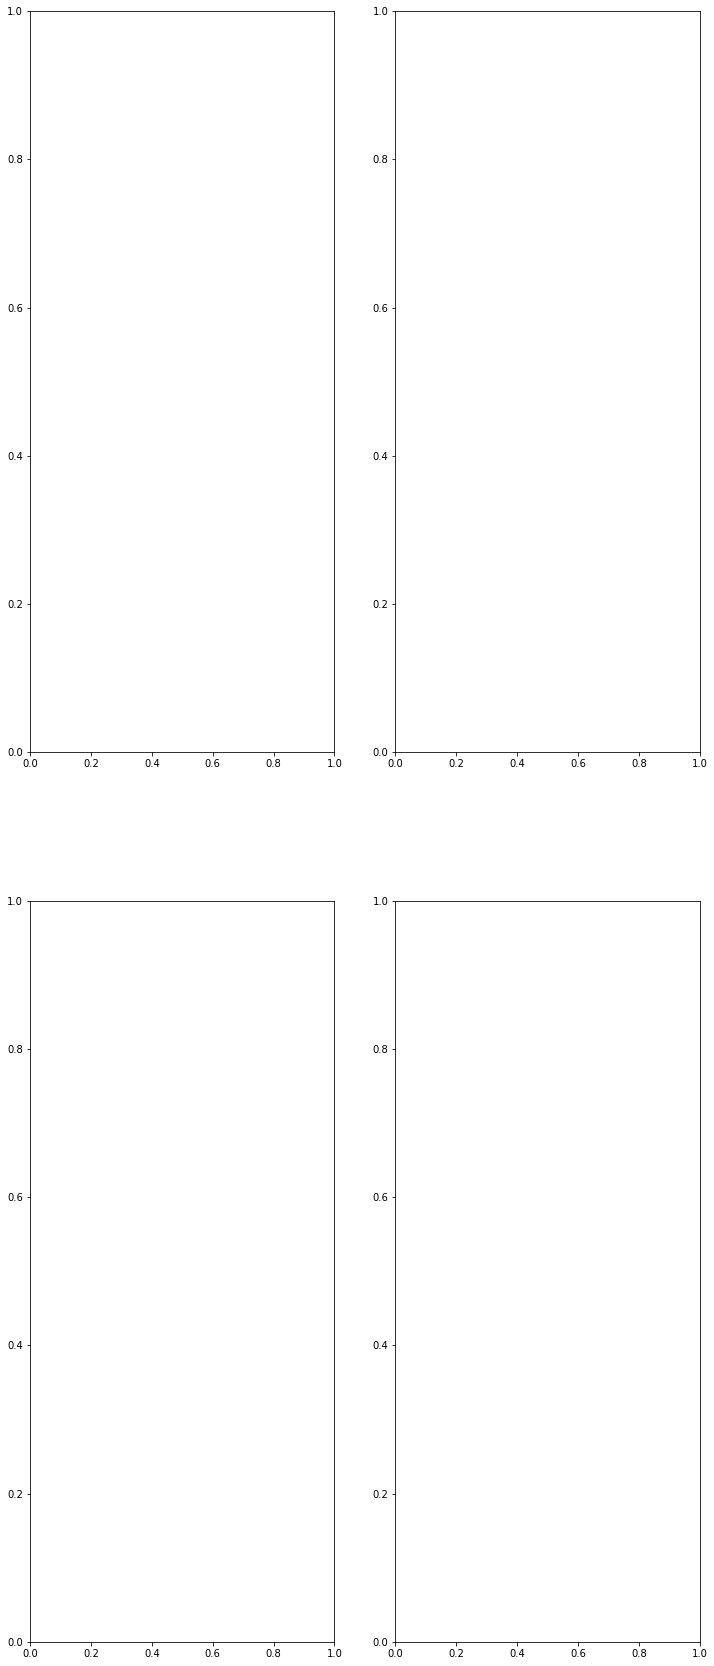

In [43]:
fig, axes = plt.subplots(2,2, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_continuous.columns):
        _=ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45);
        _=sns.barplot(x="sampling", y="Bacc_mean", data=df, ax=ax);
        
fig.tight_layout()

In [93]:
round(df['Bacc_mean'], 2)

0    0.68
1    0.69
2    0.68
3    0.68
Name: Bacc_mean, dtype: float64

In [89]:
bacc_mean.apply(lambda x: round(x, 2))

AttributeError: 'tuple' object has no attribute 'apply'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

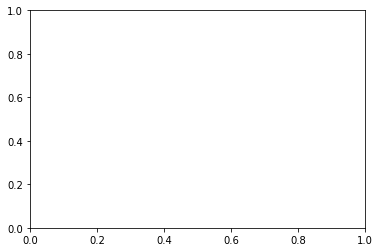

In [94]:
#men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
#women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
fmr_mean, fmr_std = df['FMR_mean'].tolist(), df['FMR_std'].tolist()
fnmr_mean, fnmr_std = df['FNMR_mean'].tolist(), df['FNMR_std'].tolist()
bacc_mean, bacc_std = df['Bacc_mean'].tolist(), df['Bacc_std'].tolist()

ind = np.arange(3)  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fmr_mean, width, yerr=fmr_std,
                color='SkyBlue', label='FMR')
rects2 = ax.bar(ind + width, fnmr_mean, width, yerr=women_std,
                color='IndianRed', label='FNMR')
rects3 = ax.bar(ind + 2*width, bacc_mean, width, yerr=bacc_std,
                color='yellow', label='BAcc')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('0.3', '0.5', '0.7'))
ax.legend()


In [47]:
tuple(df['FMR_mean'])

(0.22936654513990307,
 0.2202518363489162,
 0.23705429569283712,
 0.23849595669474166)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

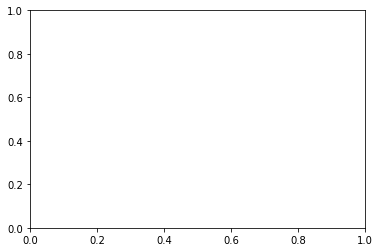

In [95]:
#men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
#women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
#fmr_mean, fmr_std = df['FMR_mean'].tolist(), df['FMR_std'].tolist()
#fnmr_mean, fnmr_std = df['FNMR_mean'].tolist(), df['FNMR_std'].tolist()
#bacc_mean, bacc_std = df['Bacc_mean'].tolist(), df['Bacc_std'].tolist()

fmr_mean, fmr_std = tuple(df['FMR_mean']), tuple(df['FMR_std'])
fnmr_mean, fnmr_std = tuple(df['FNMR_mean']), tuple(df['FNMR_std'])
bacc_mean, bacc_std = tuple(df['Bacc_mean']), tuple(df['Bacc_std'])


ind = np.arange(3)  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fmr_mean, width, yerr=fmr_std,
                color='SkyBlue', label='FMR')
rects2 = ax.bar(ind + width, fnmr_mean, width, yerr=women_std,
                color='IndianRed', label='FNMR')
rects3 = ax.bar(ind + 2*width, bacc_mean, width, yerr=bacc_std,
                color='yellow', label='BAcc')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('0.3', '0.5', '0.7'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
#autolabel(rects2, "right")
#autolabel(rects3, "center")

plt.show()

In [25]:
ind

array([0, 1, 2, 3])

In [55]:
men_means
bacc_mean

(20, 35, 30, 35, 27)

(0.6814977873025568,
 0.6852783044713902,
 0.6777963815653462,
 0.6775755182837924)

##### Parametrização 1

In [ ]:
df = resultados.loc[(resultados['adaptive']=="False") &
                    (resultados['method']=="Euclidian"), :].reset_index(drop=True)
df.shape

In [ ]:
df

In [ ]:
df.loc[df['sampling']=='Random', 'Bacc_mean']

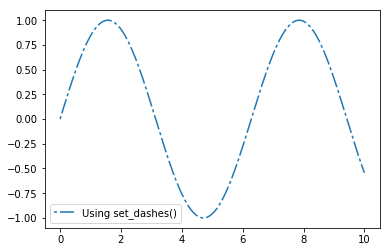

In [40]:
x = np.linspace(0, 10, 500)
y = np.sin(x)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
#line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend()
plt.show()

In [ ]:
tuple(df['Bacc_mean'])

In [ ]:
ind
width
ind - width/2
ind + width/2

In [ ]:
bacc_means

In [ ]:
rects1 = ax.bar(ind, bacc_means, width, yerr=bacc_std,
                color='SkyBlue', label='Bacc')

In [80]:
bacc_means

(0.6814977873025568,
 0.6852783044713902,
 0.6777963815653462,
 0.6775755182837924,
 0)

In [66]:
bacc_mean + (0,)

(0.6814977873025568,
 0.6852783044713902,
 0.6777963815653462,
 0.6775755182837924,
 0)

In [87]:
round(bacc_mean[0], 2)

0.68

In [ ]:
#First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

#Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

#Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

#Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

#Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

#Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

#Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

#Creates figure number 10 with a single subplot
#and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

In [49]:
men_means

(20, 35, 30, 35, 27)

In [54]:
rects1
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('0.3'))
ax.legend()
plt.show()

<Container object of 5 artists>

Text(17.2,0.5,'Scores')

Text(0.5,1,'Scores by group and gender')

[Text(0,0,'0'), Text(1,0,'.'), Text(2,0,'3')]

Text(0,0.5,'Scores')

Text(0.5,1,'Scores by group and gender')

[Text(0,0,'0.3'), Text(0,0,'0.5'), Text(0,0,'0.7')]

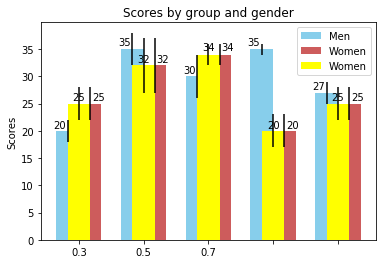

In [51]:
men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')
rects3 = ax.bar(ind, women_means, width, yerr=women_std,
                color='yellow', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('0.3', '0.5', '0.7'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")
autolabel(rects3, "center")

plt.show()

In [ ]:
_=plt.bar(np.arange(len(VARS)), VARS_VALUES)

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_continuous.columns):
        _=ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45);
        _=sns.boxplot(x="category_var", y="continuous_var", data=df, ax=ax);
        
fig.tight_layout()

In [ ]:
df.hist(figsize=(16,20), bins=5-, xlabelsize=8, ylabelsize=8);

In [ ]:
corr = df.corr().round(2)

plt.figure(figsize=(16,14))
sns.heatmap(corr, cmap="PRGn", vmax=1.0, vmin=-1.0, linewidth=0.1, annot=True, annot_kws={"size": 8}, square=True)

In [ ]:
#dummies to target
fig, axes = plt.subplots(10,10, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_continuous.columns):
        cm = pd.crosstab(df_dummies.iloc[:,i], full_tabnle["target"]).apply(lambda r: r/r.sum())
        _=ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45);
        _=sns.heatmap(cm, cmap="Oranges", linewidth=0.1, annot=True, annot_kws={"size": 8}, square=True);
        
fig.tight_layout()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2. sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot("VAR", ax=ax_box)
sns.distplot("VAR", ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_box)
sns.despine(ax=ax_hist)


In [ ]:
_=plt.bar(np.arange(len(VARS)), VARS_VALUES)

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_continuous.columns):
        _=ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45);
        _=sns.boxplot(x="category_var", y="continuous_var", data=df, ax=ax);
        
fig.tight_layout()

In [ ]:
df.hist(figsize=(16,20), bins=5-, xlabelsize=8, ylabelsize=8);

In [ ]:
corr = df.corr().round(2)

plt.figure(figsize=(16,14))
sns.heatmap(corr, cmap="PRGn", vmax=1.0, vmin=-1.0, linewidth=0.1, annot=True, annot_kws={"size": 8}, square=True)

In [ ]:
#dummies to target
fig, axes = plt.subplots(10,10, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_continuous.columns):
        cm = pd.crosstab(df_dummies.iloc[:,i], full_tabnle["target"]).apply(lambda r: r/r.sum())
        _=ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45);
        _=sns.heatmap(cm, cmap="Oranges", linewidth=0.1, annot=True, annot_kws={"size": 8}, square=True);
        
fig.tight_layout()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2. sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot("VAR", ax=ax_box)
sns.distplot("VAR", ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_box)
sns.despine(ax=ax_hist)
